## Q1
A neural network is a computational model inspired by the brain's structure. To build one, you gather data, preprocess it, design the network architecture, initialize parameters, perform forward and backward propagation, update parameters iteratively, and evaluate performance.

## Q2
Neural network performance is assessed using metrics like accuracy, precision, recall, F1-score, and AUC-ROC. This evaluation ensures the model's ability to generalize to unseen data and make reliable predictions.It's essential to assess the performance of a neural network to ensure that it can generalize well to unseen data and provide reliable predictions. By evaluating the model's performance, we can determine its strengths and weaknesses, identify areas for improvement, and ultimately build more effective neural networks for various applications.


## Q3

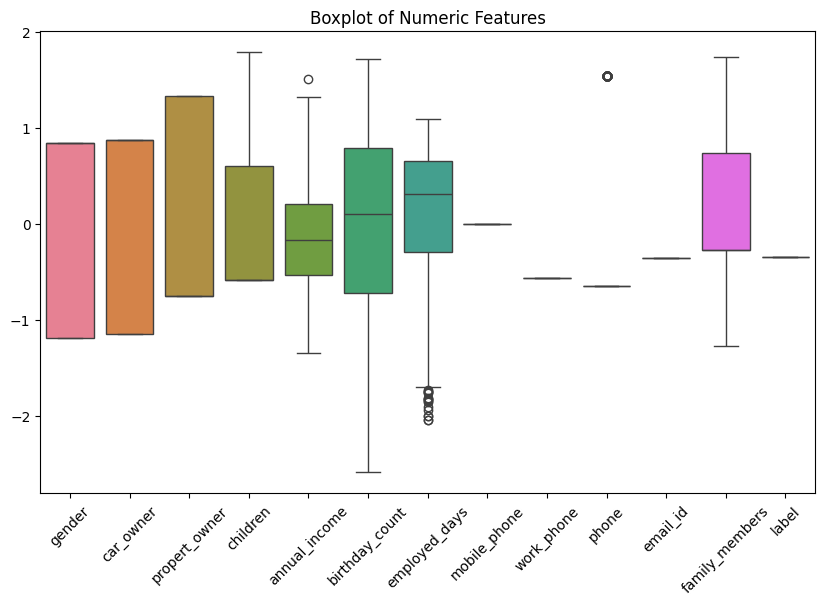

,gender,car_owner,propert_owner,children,annual_income,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label
0,-1.195370,-1.153059,1.330515,-0.586029,0.204934,-0.836928,0.088588,0.0,-0.570966,-0.652373,-0.353747,-0.273256,-0.346726
1,0.836561,0.867258,-0.751589,0.598744,-1.128934,0.088486,-0.121099,0.0,-0.570966,-0.652373,-0.353747,0.730641,-0.346726
2,0.836561,0.867258,-0.751589,-0.586029,-0.536104,-0.722548,0.236994,0.0,-0.570966,-0.652373,-0.353747,-0.273256,-0.346726
3,0.836561,0.867258,1.330515,-0.586029,-0.906623,1.188784,0.755166,0.0,-0.570966,-0.652373,-0.353747,-1.277153,-0.346726
4,-1.195370,-1.153059,-0.751589,-0.586029,-0.906623,0.778801,0.479196,0.0,-0.570966,-0.652373,-0.353747,-0.273256,-0.346726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.836561,-1.153059,1.330515,-0.586029,-0.721363,1.160837,0.850212,0.0,-0.570966,-0.652373,-0.353747,-0.273256,-0.346726
536,-1.195370,0.867258,1.330515,-0.586029,0.204934,0.438253,0.525469,0.0,-0.570966,-0.652373,-0.353747,-0.273256,-0.346726
537,0.836561,-1.153059,-0.751589,0.598744,-0.462000,0.563006,-0.094836,0.0,-0.570966,-0.652373,-0.353747,0.730641,-0.346726
539,0.836561,0.867258,1.330515,-0.586029,0.204934,1.333416,0.620099,0.0,-0.570966,-0.652373,-0.353747,-1.277153,-0.346726


In [47]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

def clean_credit_data(data_path, label_path, output_path):
    credit_df = pd.read_csv(data_path)
    credit_label_df = pd.read_csv(label_path)
    
    credits_df = pd.merge(credit_df, credit_label_df, on='Ind_ID')
    
    credits_df = credits_df.drop_duplicates()
    
    credits_df.to_csv(output_path, index=False)
    
    credits_df = credits_df.dropna()
    
    credits_df.columns = credits_df.columns.str.strip().str.lower().str.replace(' ', '_')
    
    credits_df['gender'] = credits_df['gender'].map({'M': 0, 'F': 1})
    credits_df['car_owner'] = credits_df['car_owner'].map({'Y': 0, 'N': 1})
    credits_df['propert_owner'] = credits_df['propert_owner'].map({'Y': 0, 'N': 1})
    
    numeric_cols = credits_df.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    credits_df[numeric_cols] = scaler.fit_transform(credits_df[numeric_cols])

    Q1 = credits_df[numeric_cols].quantile(0.25)
    Q3 = credits_df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    filter = (credits_df[numeric_cols] >= (Q1 - 1.5 * IQR)) & (credits_df[numeric_cols] <= (Q3 + 1.5 * IQR))
    credits_df = credits_df[filter.all(axis=1)]
    
    credits_df = credits_df.drop(['type_income', 'education', 'marital_status', 'housing_type', 'type_occupation'], axis=1)
    
    return credits_df

cleaned_data = clean_credit_data('Credit_card.csv', 'Credit_card_label.csv', 'merged_credit_data.csv')
cleaned_data.to_csv('cleaned_credit.csv')

def clean_and_plot(df):

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df.select_dtypes(include=['number']))
    plt.title('Boxplot of Numeric Features')
    plt.xticks(rotation=45) 
    plt.show()

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    mask = (df >= (Q1 - 1.5 * IQR)) & (df <= (Q3 + 1.5 * IQR))
    df_cleaned = df[mask].dropna()

    return df_cleaned

clean_df = pd.read_csv('cleaned_credit.csv')
df = clean_df.drop(columns = ['Unnamed: 0', 'ind_id'])
cleaned_df = clean_and_plot(df)

cleaned_df

Additional Cleaning:

The first enhancement was the normalization of numeric data using the `StandardScaler` from sklearn.preprocessing. This transformation scales numeric features to have zero mean and unit variance, which is essential for neural networks, ensuring all numeric data contributes equally to the analysis.

The second improvement was the removal of duplicate entries using pandas' `drop_duplicates()` method. This step eliminates any rows that had identical data across all columns, thus preventing the overrepresentation of any data point and ensuring the uniqueness of each entry in the dataset.

Lastly, I added a step to visualize and remove outliers. A boxplot was generated for all numeric features to visually identify outliers. They were then removed using the IQR method. Data points lying outside 1.5 times the IQR from the first and third quartiles were considered outliers and removed, as they can adversely affect the performance of predictive models by distorting the results.

### Q4: Keras Model

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

%pip install keras

df = pd.read_csv('cleaned_credit.csv')
X = df.drop('label', axis=1).values 
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Epoch 1/10


C:\Users\AidaBah\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 1.1513  
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1.0521 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.9747 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.8897 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.8320 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.7783 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.7182 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6560 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5818 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5555 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4967 
Accuracy: 0.00


### PyTorch Model

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

y_train = (y_train > 0).astype(int) 
y_test = (y_test > 0).astype(int)

X_train_t = torch.FloatTensor(X_train)
X_test_t = torch.FloatTensor(X_test)
y_train_t = torch.FloatTensor(y_train).view(-1, 1)
y_test_t = torch.FloatTensor(y_test).view(-1, 1)

train_data = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(dataset=train_data, batch_size=10, shuffle=True)

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = NeuralNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

with torch.no_grad():
    outputs = model(X_test_t)
    predicted = (outputs > 0.5).float()
    accuracy = (predicted.eq(y_test_t).sum() / len(y_test_t)).item()
    print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


### Q5

In comparing the performance of two neural networks I created using Keras and PyTorch, there was a significant difference in performance. The Keras model had an accuracy of 0.00, meaning it didn't correctly classify any data. The PyTorch model achieved a perfect accuracy of 1.00, correctly classifying everything. This perfect score makes me suspicious that the PyTorch model might have overfitted the data. The poor performance of the Keras model suggests there might be issues with how it was set up or how the data was prepared before training. Perhaps the data wasn't processed correctly, or there were errors in how the model was configured or trained.

Given these issues, I believe both models need adjustments. For the Keras model, I need to review the setup and data preprocessing steps to ensure everything is done correctly. I am guessing that removing the outliers from the data may have made it too simplistic. For the PyTorch model, to avoid overfitting, I could try adjusting the complexity of the model or using techniques like cross-validation might help ensure that the model generalizes better to new data.